# Importing Liabraries

In [1]:
import pandas as pd
import numpy as np

# Load Dataset

In [3]:
dataset = pd.read_csv("salary.csv")

# Summarize Datset

In [4]:
print(dataset.shape)
print(dataset.head())

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


# Mapping Salary data to Binary Value

In [12]:
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


# Segreagate Dataset into  X(Input/ Independent variable) & Y (Output/ Dependant Variable)

In [13]:
X = dataset.iloc[:, :-1]. values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [14]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

# Feature selection

In [19]:
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

rfe = RFE(model, n_features_to_select=8)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


# Splitting Dataset into Train & Test

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Finding the Best K-Value

[0.24198501412602874, 0.19862424763542563, 0.20353764893747697, 0.19186832084510502, 0.1971502272448102, 0.1874462596732588, 0.19555337182164353, 0.18978012529173321, 0.192728166072964, 0.18769192973836138, 0.1912541456823486, 0.18720058960815625, 0.19014863038938706, 0.18707775457560497, 0.1868320845105024, 0.1837612086967203, 0.18928878516152806, 0.1854808991524383, 0.18560373418498957, 0.18486672398968185, 0.1874462596732588, 0.1851123940547844, 0.1851123940547844, 0.1854808991524383, 0.18535806411988698, 0.1854808991524383, 0.18474388895713056, 0.1868320845105024, 0.1875690947058101, 0.18425254882692543, 0.18462105392457928, 0.18412971379437415, 0.1851123940547844, 0.18498955902223313, 0.1851123940547844, 0.18462105392457928, 0.18486672398968185, 0.18572656921754085, 0.18572656921754085]


Text(0, 0.5, 'Mean Error')

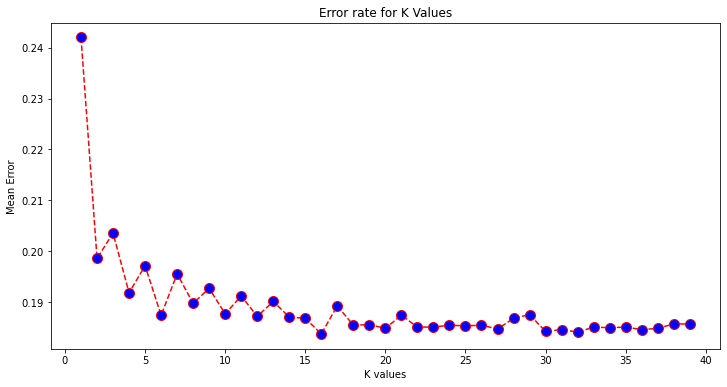

In [48]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculate the error for K values between 1 to 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

print(error)

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color= 'red', linestyle= 'dashed', marker= 'o',
        markerfacecolor = 'blue', markersize= 10)
plt.title("Error rate for K Values")
plt.xlabel("K values")
plt.ylabel("Mean Error")

# Training

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier()

# Prediction for all Test Data

In [30]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Evaluating Model - CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)

print("Confusion Matrix : \n", cm)

print(f"Accuracy of the Model : {accuracy_score(y_test, y_pred)*100}%")

Confusion Matrix : 
 [[5706  487]
 [1118  830]]
Accuracy of the Model : 80.28497727551897%


# Predicting, whether new employee with Age & hours per week wiil will get salary above 50k or not

In [56]:
age = int(input("Enter New employee's Age: "))
edu = int(input("Enter New employee's Education: "))
work_hrs = int(input("Enter New employee's hours per week: "))
cap_gain = int(input("Enter New employee's Capital Gain: "))

newEmp = [[age, edu, work_hrs, cap_gain]]
result = model.predict(sc.transform(newEmp))
print(result)

if result== 1:
    print("Employee might get salary above 50K")
else:
    print("Employee might not get salary above 50K")

Enter New employee's Age: 34
Enter New employee's Education: 50
Enter New employee's hours per week: 40
Enter New employee's Capital Gain: 0
[1]
Employee might get salary above 50K
